In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
#preprocessing the dataset.
# Converting 'yes'/'no' and other categorical values to 0/1 using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

#view the new columns
df_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [5]:
#Defining Independent (X) and Dependent (y) Variables
# X: All columns except the target column 'price'
# y: The target column we want to predict (house price)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (545, 13)
y shape: (545,)


In [4]:
#Train-Test Split
#Spliting the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (436, 13)
X_test shape: (109, 13)
y_train shape: (436,)
y_test shape: (109,)


In [7]:
#Training the Linear Regression Model
# Fit the model to the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
#Predict & Evaluate
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 970043.4039201637
MSE: 1754318687330.6633
R² Score: 0.6529242642153185


In [9]:
#Checking the Coefficients Interpret the model
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


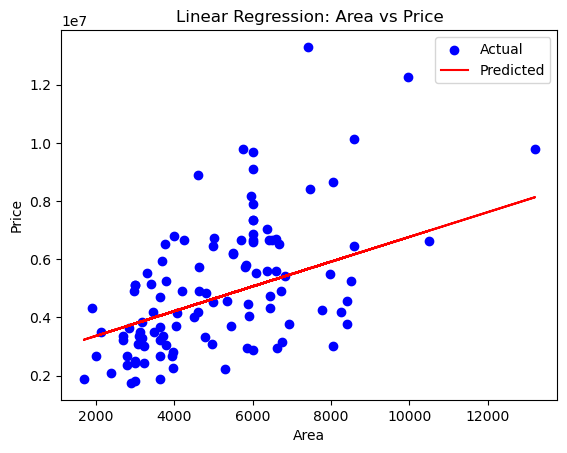

In [12]:
#Plot for Simple Regression
# Simple linear regression with just 'area'
X_area = df[['area']]
y_price = df['price']

X_train, X_test, y_train, y_test = train_test_split(X_area, y_price, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.show()
